# Machine Learning Project Tutorial
https://www.youtube.com/watch?v=29ZQ3TDGgRQ

## Loading Data

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preparation 

In [3]:
y = df['logS']
y
X = df.drop('logS', axis=1) # axis = 1 means column
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting for Training

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model Building 

### Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

# Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Applying the model to make a prediction
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)



In [6]:
# Evaluate model training (comparing actual values to predicted values)
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [7]:
print("Mean Squared Error")
print("Training: ", lr_train_mse)
print("Test: ", lr_test_mse)

print("R2 score")
print("Training: ", lr_train_r2)
print("Test: ", lr_test_r2)


Mean Squared Error
Training:  1.0075362951093687
Test:  1.0206953660861033
R2 score
Training:  0.7645051774663391
Test:  0.7891616188563282


In [11]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = (['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### Random Forest


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


In [13]:
# Evaluate model training (comparing actual values to predicted values)
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [14]:
print("Mean Squared Error")
print("Training: ", rf_train_mse)
print("Test: ", rf_test_mse)

print("R2 score")
print("Training: ", rf_train_r2)
print("Test: ", rf_test_r2)

Mean Squared Error
Training:  1.028227802112806
Test:  1.407688264904896
R2 score
Training:  0.7596688824431413
Test:  0.7092230211002489


In [18]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = (['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [22]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization

Text(0.5, 0, 'Experimental LogS')

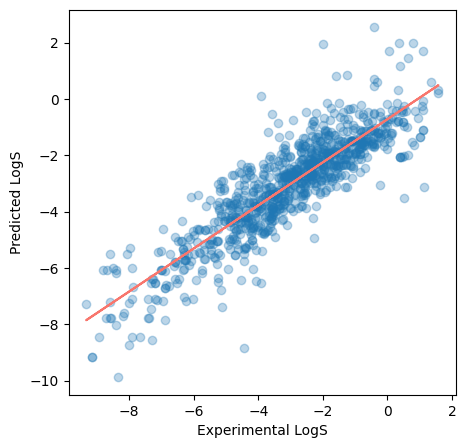

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y = y_lr_train_pred, alpha=0.3)

trendline = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(trendline)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel("Predicted LogS")
plt.xlabel("Experimental LogS")